In [1]:
#set dependicies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
#pull in total energy data files
residential_df = pd.read_csv("data_output/cleaned_Residential_Energy.csv")
commercial_df = pd.read_csv("data_output/cleaned_Commercial_Energy.csv")
industrial_df = pd.read_csv("data_output/cleaned_Industrial_Energy.csv")

In [3]:
residential_df.drop(columns=["Unnamed: 0"], inplace = True)
commercial_df.drop(columns=["Unnamed: 0"], inplace = True)
industrial_df.drop(columns=["Unnamed: 0"], inplace = True)

In [4]:
#set State column as Index
residential_df.set_index("State", inplace = True)
commercial_df.set_index("State", inplace = True)
industrial_df.set_index("State", inplace = True)

In [5]:
#Transpose Data
t_residential_df = residential_df.T
t_commercial_df = commercial_df.T
t_industrial_df = industrial_df.T

In [6]:
t_residential_df.sort_index(inplace = True,ascending=True)
t_commercial_df.sort_index(inplace = True,ascending=True)
t_industrial_df.sort_index(inplace = True,ascending=True)

In [7]:
t_industrial_df

State,USA-AK,USA-AL,USA-AR,USA-AZ,USA-CA,USA-CO,USA-CT,USA-DE,USA-FL,USA-GA,...,USA-SD,USA-TN,USA-TX,USA-UT,USA-VA,USA-VT,USA-WA,USA-WI,USA-WV,USA-WY
2000,401675,990428,476543,225886,2094271,312254,124719,112954,559871,911983,...,69966,731073,6833893,254196,580574,27250,746492,712477,301593,231442
2001,409960,849465,447636,213987,2089449,378721,114029,113066,559778,845079,...,56746,755091,6561397,226033,542576,26465,517309,690360,298767,237914
2002,411348,857704,456906,204137,1953103,356356,107708,113831,531592,931985,...,63943,734239,6682014,181947,520245,25662,434334,674042,323615,236105
2003,402842,877629,444429,198138,1928700,371668,122066,109899,544761,884294,...,71586,737143,6657950,202061,542319,24674,451507,663451,288385,246317
2004,389872,941966,435855,224216,1997588,376686,116461,95307,530146,919986,...,82711,750520,6742684,210318,564372,29543,476433,687521,298752,241183
2005,418115,930987,431591,220120,1937656,387747,118448,97921,535556,886636,...,91969,755357,6034756,227682,573677,28137,521097,671736,286005,239560
2006,353673,933217,441382,226196,1908391,396319,111351,92197,551744,881249,...,98362,752582,6086623,218340,549105,28086,567785,637985,319033,253287
2007,356533,915657,440996,221076,1894789,405162,107395,90639,525469,853354,...,109344,728427,6006890,218417,545606,26619,509658,635263,339520,289111
2008,317535,876097,421531,232755,1846322,412273,81049,90123,518118,777325,...,130706,713336,5491399,216727,519228,24124,526033,617199,339294,301152
2009,334430,711199,365081,197015,1713404,414088,87157,58909,466630,707159,...,138686,580137,5161411,200627,445342,25750,525488,554453,255012,294017


#three highest states = CA, FL, AZ
#three lowest states = AK, SD, ND

# Analysis of the 3 States with Highest Solar Energy Consumption (CA, FL, AZ)

In [8]:
CA_res = t_residential_df["USA-CA"]
CA_com = t_commercial_df["USA-CA"]
CA_ind = t_industrial_df["USA-CA"]



In [9]:
CA_combined = pd.merge(CA_res, CA_com, left_index = True, right_index = True)
CA_final = pd.merge(CA_combined, CA_ind,left_index = True, right_index = True)
CA_final.columns = ["Residential", "Commercial", "Industrial"]
CA_final["Total Consumption"] = CA_final.sum(axis = 1)
CA_final

,Residential,Commercial,Industrial,Total Consumption
2000,1426721,1354275,2094271,4875267
2001,1417985,1443700,2089449,4951134
2002,1425659,1453641,1953103,4832403
2003,1455716,1422511,1928700,4806927
2004,1489320,1535683,1997588,5022591
2005,1449101,1484593,1937656,4871350
2006,1488574,1521164,1908391,4918129
2007,1474374,1536055,1894789,4905218
2008,1511586,1572133,1846322,4930041
2009,1483981,1514229,1713404,4711614


In [10]:
co2_residential_df = pd.read_csv("data_output/residential_c02.csv")
co2_commercial_df = pd.read_csv("data_output/commercial_c02.csv")
co2_industrial_df = pd.read_csv("data_output/industrial_c02.csv")

In [11]:
#set 'States' as index
co2_residential_df.set_index("States", inplace = True)
co2_commercial_df.set_index("States", inplace = True)
co2_industrial_df.set_index("States", inplace = True)

In [12]:
#Transpose dfs
t_co2_residential_df = co2_residential_df.T
t_co2_commercial_df =co2_commercial_df.T
t_co2_industrial_df = co2_industrial_df.T

In [13]:
CA_co2_res = t_co2_residential_df["CA"]
CA_co2_com = t_co2_commercial_df["CA"]
CA_co2_ind = t_co2_industrial_df["CA"]

In [14]:
CA_co2_combined = pd.merge(CA_co2_res, CA_co2_com, left_index = True, right_index = True)
CA_co2_final = pd.merge(CA_co2_combined, CA_co2_ind,left_index = True, right_index = True)
CA_co2_final.columns = ["Residential", "Commercial", "Industrial"]
CA_co2_final["Total Emissions"] = CA_co2_final.sum(axis = 1)
CA_co2_final

,Residential,Commercial,Industrial,Total Emissions
2000,27.556368,14.366772,65.096401,107.019541
2001,28.656476,14.845360,67.317006,110.818842
2002,28.675074,14.231895,67.995338,110.902307
2003,28.353830,14.003348,68.561117,110.918295
2004,29.435211,14.118474,71.613267,115.166952
2005,28.212989,14.227760,68.653359,111.094108
2006,28.407659,14.448096,68.042518,110.898273
2007,28.623544,15.077789,66.445847,110.147180
2008,28.775868,15.615547,65.000896,109.392311
2009,28.308627,15.582681,61.017294,104.908602


In [17]:
CA_consumption = CA_final["Total Consumption"]
CA_emissions = CA_co2_final["Total Emissions"]

In [39]:
def regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r-squared is: {round(rvalue**2,3)}")
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    return line_eq, rvalue
    

The r-squared is: 0.495


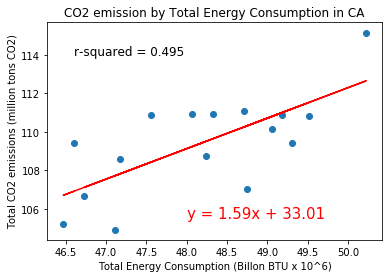

In [34]:
CA_x = CA_final["Total Consumption"]/100000
CA=regression(CA_x, CA_co2_final["Total Emissions"])
plt.title("CO2 emission by Total Energy Consumption in CA")
plt.xlabel('Total Energy Consumption (Billon BTU x 10^6)')
plt.ylabel('Total CO2 emissions (million tons CO2)')
plt.annotate(CA[0],(48,105.5),fontsize=15,color="red")
rsquare = round(CA[1]**2,3)
plt.annotate(f"r-squared = {rsquare}", (46.6,114), fontsize=12)
plt.savefig("images/CA_regress.png")
plt.show()


The r-squared is: 0.495


NameError: name 'rvalue' is not defined

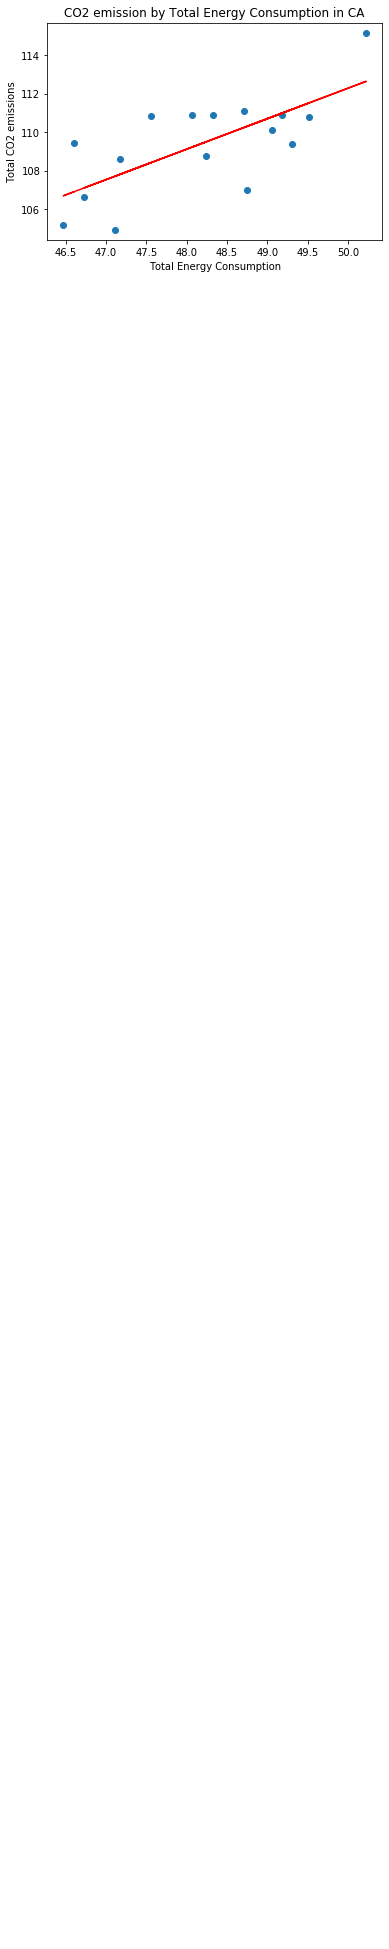

In [24]:
CA_x = CA_final["Total Consumption"]/100000
CA=regression(CA_x, CA_co2_final["Total Emissions"])
plt.title("CO2 emission by Total Energy Consumption in CA")
plt.xlabel('Total Energy Consumption')
plt.ylabel('Total CO2 emissions')
plt.annotate(CA,(48,16),fontsize=15,color="red")
rsquare = round(rvalue**2,2)
plt.annotate(f"r-squared = {rsquare}", (47,114), fontsize=12)
#plt.savefig("images/Fig19.png")
plt.show()

The r-squared is: 0.4952
The actual slope is: 1.585795579551714e-05


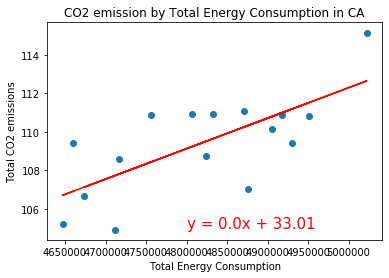

In [18]:
x_values = CA_final["Total Consumption"]
y_values = CA_co2_final["Total Emissions"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-") #red solid line
plt.annotate(line_eq,(4800000,105),fontsize=15,color="red")
plt.title("CO2 emission by Total Energy Consumption in CA")
plt.xlabel('Total Energy Consumption')
plt.ylabel('Total CO2 emissions')

print(f"The r-squared is: {round(rvalue**2,4)}")
print(f"The actual slope is: {slope}")
plt.savefig("images/Fig18.png")
plt.show()

In [36]:
FL_res = t_residential_df["USA-FL"]
FL_com = t_commercial_df["USA-FL"]
FL_ind = t_industrial_df["USA-FL"]
FL_combined = pd.merge(FL_res, FL_com, left_index = True, right_index = True)
FL_final = pd.merge(FL_combined, FL_ind,left_index = True, right_index = True)
FL_final.columns = ["Residential", "Commercial", "Industrial"]
FL_final["Total Consumption"] = FL_final.sum(axis = 1)
FL_final

,Residential,Commercial,Industrial,Total Consumption
2000,1162604,949471,559871,2671946
2001,1165291,951670,559778,2676739
2002,1235554,995300,531592,2762446
2003,1257345,994939,544761,2797045
2004,1249670,1021070,530146,2800886
2005,1263599,1030708,535556,2829863
2006,1265230,1033460,551744,2850434
2007,1254926,1040386,525469,2820781
2008,1216701,1034041,518118,2768860
2009,1223002,1007221,466630,2696853


In [37]:
FL_co2_res = t_co2_residential_df["FL"]
FL_co2_com = t_co2_commercial_df["FL"]
FL_co2_ind = t_co2_industrial_df["FL"]

FL_co2_combined = pd.merge(FL_co2_res, FL_co2_com, left_index = True, right_index = True)
FL_co2_final = pd.merge(FL_co2_combined, FL_co2_ind,left_index = True, right_index = True)
FL_co2_final.columns = ["Residential", "Commercial", "Industrial"]
FL_co2_final["Total Emissions"] = FL_co2_final.sum(axis = 1)
FL_co2_final

,Residential,Commercial,Industrial,Total Emissions
2000,1.514570,4.795284,13.838980,20.148834
2001,1.425698,4.889205,13.171936,19.486839
2002,1.379751,5.003840,11.506690,17.890281
2003,1.407868,4.944626,12.383540,18.736034
2004,1.543502,5.843001,11.026311,18.412814
2005,1.492089,5.655670,11.400971,18.548730
2006,1.420972,5.169727,11.642707,18.233406
2007,1.314056,4.677422,10.505260,16.496738
2008,1.326894,4.786957,10.412060,16.525911
2009,1.429348,4.796042,9.122007,15.347397


The r-squared is: 0.205


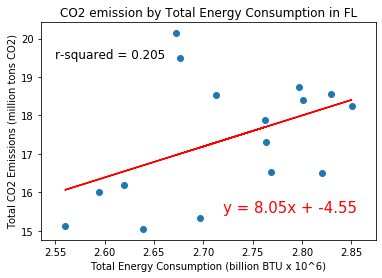

In [43]:
FL_x = FL_final["Total Consumption"]/1000000
FL=regression(FL_x, FL_co2_final["Total Emissions"])
plt.title("CO2 emission by Total Energy Consumption in FL")
plt.xlabel('Total Energy Consumption (billion BTU x 10^6)')
plt.ylabel('Total CO2 Emissions (million tons CO2)')
plt.annotate(FL[0],(2.72,15.5),fontsize=15,color="red")
rsquare = round(FL[1]**2,3)
plt.annotate(f"r-squared = {rsquare}", (2.55,19.5), fontsize=12)
plt.savefig("images/FL_reg.png")
plt.show()

In [44]:
AZ_res = t_residential_df["USA-AZ"]
AZ_com = t_commercial_df["USA-AZ"]
AZ_ind = t_industrial_df["USA-AZ"]
AZ_combined = pd.merge(AZ_res, AZ_com, left_index = True, right_index = True)
AZ_final = pd.merge(AZ_combined, AZ_ind,left_index = True, right_index = True)
AZ_final.columns = ["Residential", "Commercial", "Industrial"]
AZ_final["Total Consumption"] = AZ_final.sum(axis = 1)
AZ_final

,Residential,Commercial,Industrial,Total Consumption
2000,332073,314579,225886,872538
2001,340074,312480,213987,866541
2002,333695,311230,204137,849062
2003,345614,310692,198138,854444
2004,356054,313878,224216,894148
2005,367317,322978,220120,910415
2006,383046,333127,226196,942369
2007,394012,341414,221076,956502
2008,385383,342185,232755,960323
2009,373842,332909,197015,903766


In [45]:
AZ_co2_res = t_co2_residential_df["AZ"]
AZ_co2_com = t_co2_commercial_df["AZ"]
AZ_co2_ind = t_co2_industrial_df["AZ"]

AZ_co2_combined = pd.merge(AZ_co2_res, AZ_co2_com, left_index = True, right_index = True)
AZ_co2_final = pd.merge(AZ_co2_combined, AZ_co2_ind,left_index = True, right_index = True)
AZ_co2_final.columns = ["Residential", "Commercial", "Industrial"]
AZ_co2_final["Total Emissions"] = AZ_co2_final.sum(axis = 1)
AZ_co2_final

,Residential,Commercial,Industrial,Total Emissions
2000,2.130566,2.191164,4.252297,8.574027
2001,2.190491,2.084873,4.381861,8.657225
2002,2.166258,2.164202,3.774588,8.105048
2003,2.132916,2.046614,3.556457,7.735987
2004,2.241620,2.020472,3.931883,8.193975
2005,2.129516,2.004572,4.395080,8.529168
2006,2.151075,2.034221,4.499438,8.684734
2007,2.273927,2.118878,4.374309,8.767114
2008,2.416741,2.406612,4.950794,9.774147
2009,2.181863,2.196447,3.726817,8.105127


The r-squared is: 0.46


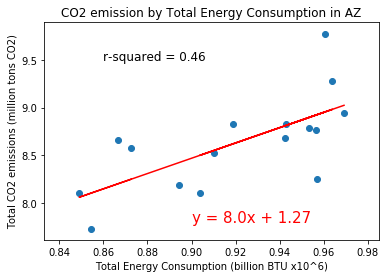

In [51]:
AZ_x = AZ_final["Total Consumption"]/1000000
AZ=regression(AZ_x, AZ_co2_final["Total Emissions"])
plt.title("CO2 emission by Total Energy Consumption in AZ")
plt.xlabel('Total Energy Consumption (billion BTU x10^6)')
plt.ylabel('Total CO2 emissions (million tons CO2)')
plt.annotate(AZ[0],(0.9,7.8),fontsize=15,color="red")
rsquare = round(AZ[1]**2,3)
plt.annotate(f"r-squared = {rsquare}", (0.86,9.5), fontsize=12)
plt.savefig("images/AZ_reg.png")
plt.show()

r-squared USA total = 0.52
CA r-squared = 0.4952
FL r-squared = 0.205
AZ r-squared = 0.46
For the 3 states with the highest solar energy consumption, their r2 is < that for all of USA (although CA and AZ probably aren't significantly different).

# Analysis of the 3 States with  Lowest Solar Energy Consumption (AK, SD, ND)

In [49]:
AK_res = t_residential_df["USA-AK"]
AK_com = t_commercial_df["USA-AK"]
AK_ind = t_industrial_df["USA-AK"]
AK_combined = pd.merge(AK_res, AK_com, left_index = True, right_index = True)
AK_final = pd.merge(AK_combined, AK_ind,left_index = True, right_index = True)
AK_final.columns = ["Residential", "Commercial", "Industrial"]
AK_final["Total Consumption"] = AK_final.sum(axis = 1)
AK_final

,Residential,Commercial,Industrial,Total Consumption
2000,50780,69873,401675,522328
2001,54045,66274,409960,530279
2002,52028,60184,411348,523560
2003,52810,58567,402842,514219
2004,55874,63451,389872,509197
2005,53524,62403,418115,534042
2006,59556,67572,353673,480801
2007,53742,63076,356533,473351
2008,53668,64441,317535,435644
2009,53536,61825,334430,449791


In [50]:
AK_co2_res = t_co2_residential_df["AK"]
AK_co2_com = t_co2_commercial_df["AK"]
AK_co2_ind = t_co2_industrial_df["AK"]

AK_co2_combined = pd.merge(AK_co2_res, AK_co2_com, left_index = True, right_index = True)
AK_co2_final = pd.merge(AK_co2_combined, AK_co2_ind,left_index = True, right_index = True)
AK_co2_final.columns = ["Residential", "Commercial", "Industrial"]
AK_co2_final["Total Emissions"] = AK_co2_final.sum(axis = 1)
AK_co2_final

,Residential,Commercial,Industrial,Total Emissions
2000,1.729165,2.663767,21.072046,25.464978
2001,1.796026,2.458371,21.235824,25.490221
2002,1.614116,2.041855,21.650697,25.306668
2003,1.652948,1.921636,21.390271,24.964855
2004,1.790486,2.181861,20.530642,24.502989
2005,1.760192,2.093309,22.073271,25.926772
2006,2.140628,2.386856,18.770963,23.298447
2007,1.837734,2.167383,18.925227,22.930344
2008,1.775532,2.338785,16.777934,20.892251
2009,1.748371,2.178956,17.189951,21.117278


The r-squared is: 0.983


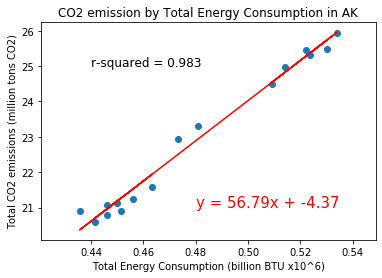

In [54]:
AK_x = AK_final["Total Consumption"]/1000000
AK=regression(AK_x, AK_co2_final["Total Emissions"])
plt.title("CO2 emission by Total Energy Consumption in AK")
plt.xlabel('Total Energy Consumption (billion BTU x10^6)')
plt.ylabel('Total CO2 emissions (million tons CO2)')
plt.annotate(AK[0],(0.48,21),fontsize=15,color="red")
rsquare = round(AK[1]**2,3)
plt.annotate(f"r-squared = {rsquare}", (0.44,25), fontsize=12)
plt.savefig("images/AK_reg.png")
plt.show()

In [55]:
SD_res = t_residential_df["USA-SD"]
SD_com = t_commercial_df["USA-SD"]
SD_ind = t_industrial_df["USA-SD"]
SD_combined = pd.merge(SD_res, SD_com, left_index = True, right_index = True)
SD_final = pd.merge(SD_combined, SD_ind,left_index = True, right_index = True)
SD_final.columns = ["Residential", "Commercial", "Industrial"]
SD_final["Total Consumption"] = SD_final.sum(axis = 1)
SD_final

,Residential,Commercial,Industrial,Total Consumption
2000,61994,46621,69966,178581
2001,63127,52856,56746,172729
2002,65433,55239,63943,184615
2003,66062,56840,71586,194488
2004,63877,55792,82711,202380
2005,66389,59723,91969,218081
2006,65350,59185,98362,222897
2007,68100,61331,109344,238775
2008,72709,62833,130706,266248
2009,72356,62487,138686,273529


In [56]:
SD_co2_res = t_co2_residential_df["SD"]
SD_co2_com = t_co2_commercial_df["SD"]
SD_co2_ind = t_co2_industrial_df["SD"]

SD_co2_combined = pd.merge(SD_co2_res, SD_co2_com, left_index = True, right_index = True)
SD_co2_final = pd.merge(SD_co2_combined, SD_co2_ind,left_index = True, right_index = True)
SD_co2_final.columns = ["Residential", "Commercial", "Industrial"]
SD_co2_final["Total Emissions"] = SD_co2_final.sum(axis = 1)
SD_co2_final

,Residential,Commercial,Industrial,Total Emissions
2000,1.215133,0.737787,2.525435,4.478355
2001,1.135981,0.713562,2.000378,3.849921
2002,1.176366,0.705826,2.267962,4.150154
2003,1.202317,0.706951,2.291035,4.200303
2004,1.058933,0.670445,2.198334,3.927712
2005,1.045365,0.662474,2.198712,3.906551
2006,0.978705,0.629443,2.148465,3.756613
2007,1.039821,0.725965,2.769928,4.535714
2008,1.222281,0.787486,3.081687,5.091454
2009,1.151779,0.811741,3.198167,5.161687


The r-squared is: 0.789


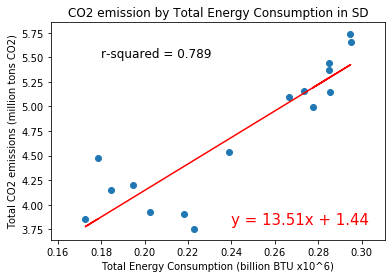

In [60]:
SD_x=SD_final["Total Consumption"]/1000000
SD=regression(SD_x, SD_co2_final["Total Emissions"])
plt.title("CO2 emission by Total Energy Consumption in SD")
plt.xlabel('Total Energy Consumption (billion BTU x10^6)')
plt.ylabel('Total CO2 emissions (million tons CO2)')
plt.annotate(SD[0],(0.24,3.8),fontsize=15,color="red")
rsquare = round(SD[1]**2,3)
plt.annotate(f"r-squared = {rsquare}", (0.18,5.5), fontsize=12)
plt.savefig("images/SD_reg.png")
plt.show()

In [61]:
ND_res = t_residential_df["USA-ND"]
ND_com = t_commercial_df["USA-ND"]
ND_ind = t_industrial_df["USA-ND"]
ND_combined = pd.merge(ND_res, ND_com, left_index = True, right_index = True)
ND_final = pd.merge(ND_combined, ND_ind,left_index = True, right_index = True)
ND_final.columns = ["Residential", "Commercial", "Industrial"]
ND_final["Total Consumption"] = ND_final.sum(axis = 1)
ND_final

,Residential,Commercial,Industrial,Total Consumption
2000,59883,48816,192258,300957
2001,61060,55663,202747,319470
2002,62852,60115,190585,313552
2003,64472,58415,188843,311730
2004,63861,59380,189048,312289
2005,61719,59652,195652,317023
2006,60253,58615,205679,324547
2007,64115,62845,207398,334358
2008,69389,65787,215959,351135
2009,68578,65382,214200,348160


In [62]:
ND_co2_res = t_co2_residential_df["ND"]
ND_co2_com = t_co2_commercial_df["ND"]
ND_co2_ind = t_co2_industrial_df["ND"]

ND_co2_combined = pd.merge(ND_co2_res, ND_co2_com, left_index = True, right_index = True)
ND_co2_final = pd.merge(ND_co2_combined, ND_co2_ind,left_index = True, right_index = True)
ND_co2_final.columns = ["Residential", "Commercial", "Industrial"]
ND_co2_final["Total Emissions"] = ND_co2_final.sum(axis = 1)
ND_co2_final

,Residential,Commercial,Industrial,Total Emissions
2000,1.276315,0.956695,11.963232,14.196242
2001,1.282811,0.976940,12.644131,14.903882
2002,1.255872,1.010186,11.923851,14.189909
2003,1.326892,0.998410,11.860836,14.186138
2004,1.323874,1.063838,11.363191,13.750903
2005,1.259005,1.120587,12.023011,14.402603
2006,1.079235,0.831947,12.470207,14.381389
2007,1.169732,1.098057,12.396124,14.663913
2008,1.314784,1.005986,12.865857,15.186627
2009,1.159474,0.962769,12.305807,14.428050


The r-squared is: 0.966


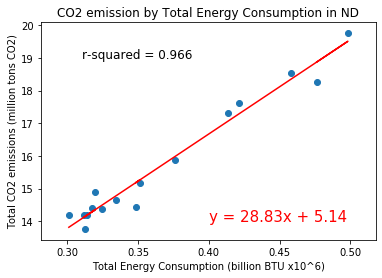

In [65]:
ND_x = ND_final["Total Consumption"]/1000000
ND=regression(ND_x, ND_co2_final["Total Emissions"])
plt.title("CO2 emission by Total Energy Consumption in ND")
plt.xlabel('Total Energy Consumption (billion BTU x10^6)')
plt.ylabel('Total CO2 emissions (million tons CO2)')
plt.annotate(ND[0],(0.40,14),fontsize=15,color="red")
rsquare = round(ND[1]**2,3)
plt.annotate(f"r-squared = {rsquare}", (0.31,19), fontsize=12)                  
plt.savefig("images/ND_reg.png")
plt.show()

r-squared for US = 0.52
r-squared for AK = 0.98
r-squared for SD = 0.789
r-squared for ND = 0.96
For the three states with the lowest solar energy consumption, the r-squared for CO2 emissions by Total Energy Consumption are very high (0.79 -0.98), suggesting that the regression models for these states account for the majority of the variance in the data observed.

# Analysis of the 3 States with Median Solar Energy Consumption (GA, UT, VT)

In [35]:
GA_res = t_residential_df["USA-GA"]
GA_com = t_commercial_df["USA-GA"]
GA_ind = t_industrial_df["USA-GA"]
GA_combined = pd.merge(GA_res, GA_com, left_index = True, right_index = True)
GA_final = pd.merge(GA_combined, GA_ind,left_index = True, right_index = True)
GA_final.columns = ["Residential", "Commercial", "Industrial"]
GA_final["Total Consumption"] = GA_final.sum(axis = 1)
GA_final

,Residential,Commercial,Industrial,Total Consumption
2000,657077,492204,911983,2061264
2001,623747,491608,845079,1960434
2002,659384,484042,931985,2075411
2003,680502,504154,884294,2068950
2004,716909,535357,919986,2172252
2005,713846,544485,886636,2144967
2006,711957,545052,881249,2138258
2007,735842,564130,853354,2153326
2008,737925,565938,777325,2081188
2009,726627,551528,707159,1985314


In [36]:
GA_co2_res = t_co2_residential_df["GA"]
GA_co2_com = t_co2_commercial_df["GA"]
GA_co2_ind = t_co2_industrial_df["GA"]

GA_co2_combined = pd.merge(GA_co2_res, GA_co2_com, left_index = True, right_index = True)
GA_co2_final = pd.merge(GA_co2_combined, GA_co2_ind,left_index = True, right_index = True)
GA_co2_final.columns = ["Residential", "Commercial", "Industrial"]
GA_co2_final["Total Emissions"] = GA_co2_final.sum(axis = 1)
GA_co2_final

,Residential,Commercial,Industrial,Total Emissions
2000,8.718965,4.140864,18.013652,30.873481
2001,7.389082,3.767390,17.501849,28.658321
2002,7.651883,3.362511,17.217536,28.231930
2003,7.908541,3.419756,17.943026,29.271323
2004,7.771901,3.785006,17.842204,29.399111
2005,7.574943,3.607969,18.013557,29.196469
2006,6.673766,3.205842,17.096582,26.976190
2007,6.756714,3.244101,15.819886,25.820701
2008,7.195282,3.410386,14.629585,25.235253
2009,7.138205,3.536471,12.697675,23.372351


The r-squared is: 0.202


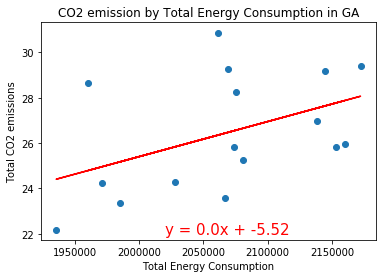

In [44]:
GA=regression(GA_final["Total Consumption"], GA_co2_final["Total Emissions"])
plt.title("CO2 emission by Total Energy Consumption in GA")
plt.xlabel('Total Energy Consumption')
plt.ylabel('Total CO2 emissions')
plt.annotate(GA,(2020000,22),fontsize=15,color="red")
plt.savefig("images/Fig24.png")
plt.show()

In [40]:
UT_res = t_residential_df["USA-UT"]
UT_com = t_commercial_df["USA-UT"]
UT_ind = t_industrial_df["USA-UT"]
UT_combined = pd.merge(UT_res, UT_com, left_index = True, right_index = True)
UT_final = pd.merge(UT_combined, UT_ind,left_index = True, right_index = True)
UT_final.columns = ["Residential", "Commercial", "Industrial"]
UT_final["Total Consumption"] = UT_final.sum(axis = 1)
UT_final

,Residential,Commercial,Industrial,Total Consumption
2000,135521,133972,254196,523689
2001,136191,139489,226033,501713
2002,144558,147503,181947,474008
2003,140733,137737,202061,480531
2004,148612,143832,210318,502762
2005,150153,147530,227682,525365
2006,155495,144928,218340,518763
2007,157073,145632,218417,521122
2008,163033,148046,216727,527806
2009,161452,148613,200627,510692


In [41]:
UT_co2_res = t_co2_residential_df["UT"]
UT_co2_com = t_co2_commercial_df["UT"]
UT_co2_ind = t_co2_industrial_df["UT"]

UT_co2_combined = pd.merge(UT_co2_res, UT_co2_com, left_index = True, right_index = True)
UT_co2_final = pd.merge(UT_co2_combined, UT_co2_ind,left_index = True, right_index = True)
UT_co2_final.columns = ["Residential", "Commercial", "Industrial"]
UT_co2_final["Total Emissions"] = UT_co2_final.sum(axis = 1)
UT_co2_final

,Residential,Commercial,Industrial,Total Emissions
2000,3.252116,2.099159,10.088965,15.440240
2001,3.295853,2.274198,8.940096,14.510147
2002,3.535110,2.588397,5.788387,11.911894
2003,3.230912,2.178427,6.002067,11.411406
2004,3.577780,2.451208,7.082487,13.111475
2005,3.396553,2.311445,8.249037,13.957035
2006,3.540497,2.248696,7.299053,13.088246
2007,3.548824,2.267689,7.506120,13.322633
2008,3.885618,2.417690,7.171058,13.474366
2009,3.783360,2.364119,6.089206,12.236685


The r-squared is: 0.201


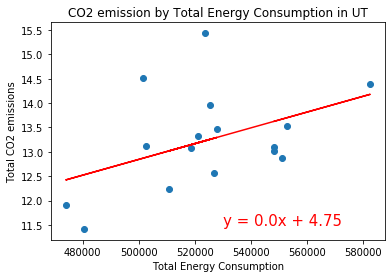

In [43]:
UT=regression(UT_final["Total Consumption"], UT_co2_final["Total Emissions"])
plt.title("CO2 emission by Total Energy Consumption in UT")
plt.xlabel('Total Energy Consumption')
plt.ylabel('Total CO2 emissions')
plt.annotate(UT,(530000,11.5),fontsize=15,color="red")
plt.savefig("images/Fig25.png")
plt.show()

In [45]:
VT_res = t_residential_df["USA-VT"]
VT_com = t_commercial_df["USA-VT"]
VT_ind = t_industrial_df["USA-VT"]
VT_combined = pd.merge(VT_res, VT_com, left_index = True, right_index = True)
VT_final = pd.merge(VT_combined, VT_ind,left_index = True, right_index = True)
VT_final.columns = ["Residential", "Commercial", "Industrial"]
VT_final["Total Consumption"] = VT_final.sum(axis = 1)
VT_final

,Residential,Commercial,Industrial,Total Consumption
2000,41575,27855,27250,96680
2001,41638,28904,26465,97007
2002,42701,30321,25662,98684
2003,44918,30870,24674,100462
2004,47863,31941,29543,109347
2005,48462,30566,28137,107165
2006,45861,29542,28086,103489
2007,45451,29426,26619,101496
2008,43101,28564,24124,95789
2009,49573,29273,25750,104596


In [46]:
VT_co2_res = t_co2_residential_df["VT"]
VT_co2_com = t_co2_commercial_df["VT"]
VT_co2_ind = t_co2_industrial_df["VT"]

VT_co2_combined = pd.merge(VT_co2_res, VT_co2_com, left_index = True, right_index = True)
VT_co2_final = pd.merge(VT_co2_combined, VT_co2_ind,left_index = True, right_index = True)
VT_co2_final.columns = ["Residential", "Commercial", "Industrial"]
VT_co2_final["Total Emissions"] = VT_co2_final.sum(axis = 1)
VT_co2_final

,Residential,Commercial,Industrial,Total Emissions
2000,1.582996,0.763053,0.555573,2.901622
2001,1.570604,0.788823,0.482099,2.841526
2002,1.471169,0.730773,0.459876,2.661818
2003,1.576057,0.774087,0.490765,2.840909
2004,1.767224,0.826530,0.568954,3.162708
2005,1.629914,0.715605,0.576249,2.921768
2006,1.521990,0.674008,0.580041,2.776039
2007,1.492554,0.676905,0.494575,2.664034
2008,1.307790,0.615226,0.488682,2.411698
2009,1.466668,0.663832,0.460189,2.590689


The r-squared is: 0.325


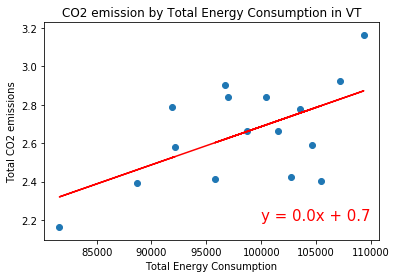

In [48]:
VT=regression(VT_final["Total Consumption"], VT_co2_final["Total Emissions"])
plt.title("CO2 emission by Total Energy Consumption in VT")
plt.xlabel('Total Energy Consumption')
plt.ylabel('Total CO2 emissions')
plt.annotate(VT,(100000,2.2),fontsize=15,color="red")
plt.savefig("images/Fig26.png")
plt.show()

Taken together, the regression models suggest that in states with the lowest solar energy consumption, the variability in CO2 emissions is mostly accounted for by the total energy consumption in that state.  In states with the hightest solar energy consumption, the variablity in CO2 emissions is inadequately accounted for by total energy consumption.

In [49]:
VT_final

,Residential,Commercial,Industrial,Total Consumption
2000,41575,27855,27250,96680
2001,41638,28904,26465,97007
2002,42701,30321,25662,98684
2003,44918,30870,24674,100462
2004,47863,31941,29543,109347
2005,48462,30566,28137,107165
2006,45861,29542,28086,103489
2007,45451,29426,26619,101496
2008,43101,28564,24124,95789
2009,49573,29273,25750,104596


In [51]:
VT_final["Res %"] = VT_final["Total Consumption"]/VT_final["Residential"]
VT_final

,Residential,Commercial,Industrial,Total Consumption,Res %
2000,41575,27855,27250,96680,2.325436
2001,41638,28904,26465,97007,2.329771
2002,42701,30321,25662,98684,2.311047
2003,44918,30870,24674,100462,2.236564
2004,47863,31941,29543,109347,2.284583
2005,48462,30566,28137,107165,2.211320
2006,45861,29542,28086,103489,2.256580
2007,45451,29426,26619,101496,2.233086
2008,43101,28564,24124,95789,2.222431
2009,49573,29273,25750,104596,2.109939
